<img src="../ancillarydata/logos/climbeco_course_logo.png" width="1000" align="left"/>
<br>
<br>


# <font color=#800000> Exercise 1</font>  
## _Intro to Jupyter Notebooks using ICOS/FLUXNET data_
<br>
In this exercise you will learn how to read data from csv-files to Pandas DataFrames (i.e. two-dimensional arrays) using Python. You will also learn how to process data in your Pandas DataFrame and create static plots with Matplotlib. You will then be able to use the these tools to statisitcally compare measurements from different stations in northern Europe.

The module is divided in the following parts:

- [Read data from csv into a Pandas DataFrame](#import_data)


- [Create plot with Matplotlib](#create_plot)
    
    - [Plot single variable](#plot_single_var)
    
    - [Plot two variables](#plot_two_var)


- [Format plot parameters](#plot_param)


- [Compare variables from different stations](#compare_var)


- [Calculate statistics](#calc_stat)

<br>

### <font color='#B22222'>Task 1</font> - Import data from csv 
Read the FLUXNET data for a specific ICOS station and save it to a Pandas DataFrame. <br>
There are two ways to do this: <br>
1. Read data from a FLUXNET csv-file to a Pandas DataFrame using the example below.

```python
    pd.read_csv("~/climbeco/data/fluxnet/obs_dd/FLX_SE-Htm_DD_2015_2018.csv",
                header = 0,
                sep = ",",
                parse_dates = ["TIMESTAMP"])```

<br>

2. Use the pre-prepared functions (*dd* for daily values, *hh* for half hourly values):
    - ```python
         read_fluxnet_dd(path, station_code, station_country_code)
         ```      
    - ```python
         read_fluxnet_hh(path, station_code, station_country_code)```

<br>

#### <font color='#8b0000'> Information to read the files </font>

**Paths** <br>
The path to the FLUXNET files (daily values) is: <font color='royalblue'> _"~/climbeco/data/fluxnet/obs_dd/"_ </font>
<br>
The path to the FLUXNET files (half-hourly values) is: <font color='royalblue'> _"~/climbeco/data/fluxnet/obs_hh/"_ </font>

<br>

**Data filename format** <br>
The filename format of a FLUXNET file (daily values) is: _"FLX_countryCode-stationCode_DD_2015_2018.csv"_
<br>
(e.g. <font color='darkorange'> _FLX_SE-Htm_DD_2015_2018.csv_ </font>)
<br>
The filename format of a FLUXNET file (half-hourly values) is: _"FLX_countryCode-stationCode_HH_2015_2018.csv"_
<br>
(e.g. <font color='darkorange'> _FLX_SE-Htm_HH_2015_2018.csv_ </font>)


To import dara for a specific station you need to know the 3-character long station code (e.g. "Htm" for Hyltemossa) and the corresponding 2-character country code (e.g. 'SE' for Sweden). A list of the available station names and country codes can be found [here](../ancillarydata/docs/climbeco_course_station_list.png).
<br>
<br>

In [4]:
%matplotlib inline

#Import modules:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

#from tools import read_fluxnet_dd, read_fluxnet_hh

In [5]:
#Define path to data:
path_fluxnet_hh = "~/climbeco/data/fluxnet/obs_hh/" #Path to directory storing half-hourly values
path_fluxnet_dd = "~/climbeco/data/fluxnet/obs_dd/" #Path to directory storing daily values

In [6]:
#Create function to read FLUXNET-file with daily values:
def read_fluxnet_hh(path, st_code, st_country_code):
      
    #Define file name:
    file = "FLX_"+st_country_code+"-"+st_code+"_HH_2015_2018.csv"
    
    #Create full path to file:
    fullpath = path + file
    
    #Read csv to pandas dataframe:
    df = pd.read_csv(fullpath,
                     header = 0,
                     sep = ",",
                     parse_dates = ["TIMESTAMP_START"])

    #Return dataframe:
    return df


In [7]:
#Call function to read FLUXNET half-hourly values for Hyltemossa station:
hh_df = read_fluxnet_hh(path_fluxnet_hh, 'Htm', 'SE')

#Show dataframe:
hh_df.head()

FileNotFoundError: [Errno 2] File C:\Users\Claudio/climbeco/data/fluxnet/obs_hh/FLX_SE-Htm_HH_2015_2018.csv does not exist: 'C:\\Users\\Claudio/climbeco/data/fluxnet/obs_hh/FLX_SE-Htm_HH_2015_2018.csv'

In [8]:
#Create function to read FLUXNET-file with daily values:
def read_fluxnet_dd(path, st_code, st_country_code):
      
    #Define file name:
    file = "FLX_"+st_country_code+"-"+st_code+"_DD_2015_2018.csv"
    
    #Create full path to file:
    fullpath = path + file
    
    #Read csv to pandas dataframe:
    df = pd.read_csv(fullpath,
                     header = 0,
                     sep = ",",
                     parse_dates = ["TIMESTAMP"])

    #Return dataframe:
    return df


In [9]:
#Call function to read FLUXNET daily values for Hyltemossa station:
dd_df = read_fluxnet_dd(path_fluxnet_dd, 'Htm', 'SE')

#Show dataframe:
dd_df.head()

FileNotFoundError: [Errno 2] File C:\Users\Claudio/climbeco/data/fluxnet/obs_dd/FLX_SE-Htm_DD_2015_2018.csv does not exist: 'C:\\Users\\Claudio/climbeco/data/fluxnet/obs_dd/FLX_SE-Htm_DD_2015_2018.csv'

<br>
<br>
<div style="text-align: right"> 
    <a href="#intro">Back to top</a>
</div>

<a id="create_plot"></a>

<br>

### <font color='#B22222'>Task 2</font> - Create a plot using Matplotlib
Matplotlib is a visualization library for plotting in Python. In this twofold task you will learn how to create plots for one or more variables stored as columns in a Pandas DataFrame.

Before you move on creating the plots, take a look at the columns of your Pandas DataFrame. It can be hard to guess the content of a column based on its current name. A detailed description of the FLUXNET variables along with their corresponding unit can be found [here](https://fluxnet.fluxdata.org/data/fluxnet2015-dataset/fullset-data-product/). 

Observe that some variables are only available for the dataset with daily values whilst others might only be available for the dataset with half-hourly values. Also note that the unit for a variable available in both datasets (i.e. half-hourly & daily) might be different. 

<a id="plot_single_var"></a>


#### <font color='#B22222'>Task 2.1</font> - Create a plot using Matplotlib (1 variable)
In this part, you will plot a timeseries for one variable. The code in the example below plots air temperature (daily values) over time (2015-2018).

<br>

Here's the syntax to create a simple plot in Python:

```python
%matplotlib inline

#Import modules:
from matplotlib import pyplot as plt

#Create a plot (i.e. "figure") object and set the size of your plot:
fig = plt.figure(figsize=(10, 6))

#Plot Air Temperature (daily values):
plt.plot(dd_df.TIMESTAMP, dd_df.TA_F)

#Show plot:
plt.show()

```

<br>

```%matplotlib inline``` is a command that tells your Jupyter notebook to create static matplotlib plots. The command is used once, in the first code-cell of the notebook. **dd_df** is a variable representing a Pandas DataFrame with FLUXNET daily values. **TIMESTAMP** and **TA_F** are the FLUXNET variable names for time and air temperature respectively.  
If you execute the code above, it should generate the following output. 

<img src="../ancillarydata/images/mod1/plot1_ex.png">

<br>

Try to create plots for other variables in your Pandas DataFrame.

<br>
<br>

In [10]:
#Import modules:
from matplotlib import pyplot as plt

#Create a plot (i.e. "figure") object and set the size of your plot:
fig = plt.figure(figsize=(8, 6))

#Plot values for daily Air Temperature:
plt.plot(dd_df.TIMESTAMP, dd_df.TA_F)

#show plot:
plt.show()

NameError: name 'dd_df' is not defined

<Figure size 576x432 with 0 Axes>

<br>
<br>
<div style="text-align: right"> 
    <a href="#intro">Back to top</a>
</div>
<br>
<br>

<a id="plot_two_var"></a>

#### <font color='#B22222'>Task 2.2</font> - Create a plot using Matplotlib (two variables)
Here's the syntax to create a simple plot of two variables in Python:

```python

#Import modules:
from matplotlib import pyplot as plt

#Create a plot (i.e. "figure") object and set the size of your plot:
fig = plt.figure(figsize=(10, 6))

#Plot values for Air Temperature (daily values):
plt.plot(dd_df.TIMESTAMP, dd_df.TA_F)

#Plot values for daytime GPP (daily values):
plt.plot(dd_df.TIMESTAMP, dd_df.GPP_DT_VUT_MEAN)

#Show plot:
plt.show()

```

<br>

 **dd_df** is a variable representing a Pandas DataFrame with daily values for FLUXNET variables measured at Hyltemossa ICOS station in Sweden. **TIMESTAMP**, **TA_F** and **GPP_DT_VUT_MEAN** are the corresponding FLUXNET variable names for time, air temperature and GPP (daytime).  
If you execute the code above, it should generate the following output. 

<img src="../ancillarydata/images/mod1/plot2_ex.png">

<br>

Try to produce a plot for another combination of variables.

In [ ]:

#Import modules:
from matplotlib import pyplot as plt

#Create a plot (i.e. "figure") object and set the size of your plot:
fig = plt.figure(figsize=(10, 6))

#Plot values for daily Air Temperature:
plt.plot(dd_df.TIMESTAMP, dd_df.TA_F)

#Plot values for daytime GPP (daily values):
plt.plot(dd_df.TIMESTAMP, dd_df.GPP_DT_VUT_MEAN)

plt.show()

<br>
<br>
<div style="text-align: right"> 
    <a href="#intro">Back to top</a>
</div>
<br>
<br>

<a id="plot_param">

<br>

### <font color='#B22222'>Task 3</font> - Format plot parameters
A plot is not complete without a title, axes labels and a legend. The next example showcases how these can be added to your plot. You will also see how to change the type and/or color of the line as well as how to add a secondary y-axis to the plot. More information on how to style your plot can be found [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html).

```python

#Add grid:
plt.style.use('seaborn-whitegrid')

#Create a plot (i.e. "figure") object and set the size of your plot:
fig, ax = plt.subplots(figsize=(16, 6))

#Add plot title:
plt.title('AIR TEMPERATURE & GPP - FLUXNET TIMESERIES (HTM, SE)')

#Plot values for daily Air Temperature:
ax.plot(dd_df.TIMESTAMP, dd_df.TA_F,
        linestyle = '-.', linewidth = 0.6, color = 'darkorange',
        label = 'Air Temperature')

#Plot values for daytime GPP (daily values):
ax.plot(dd_df.TIMESTAMP, dd_df.GPP_DT_VUT_MEAN,
        linestyle = '-', linewidth = 1.7, color = '#6699CC',
        label = 'GPP')

#Add secondary y-axis:
secaxy = ax.secondary_yaxis('right')

#Add x-axis label:
plt.xlabel('Time')

#Add y-axis label:
plt.ylabel('Air Temperature (C \N{DEGREE SIGN})')

#Add secondary y-axis label:
secaxy.set_ylabel('GPP (gC / m2 / d)')

#Add legend:
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
#Show plot:
plt.show()
```

<br>

If you run the code above, you should get the following output:
<br>

<img src='../ancillarydata/images/mod1/plot2ndyaxis_ex.png' width=800>

<br>

Try to add and format the plot parameters of the plots you created in task 2.

<br>
<br>

NameError: name 'dd_df' is not defined

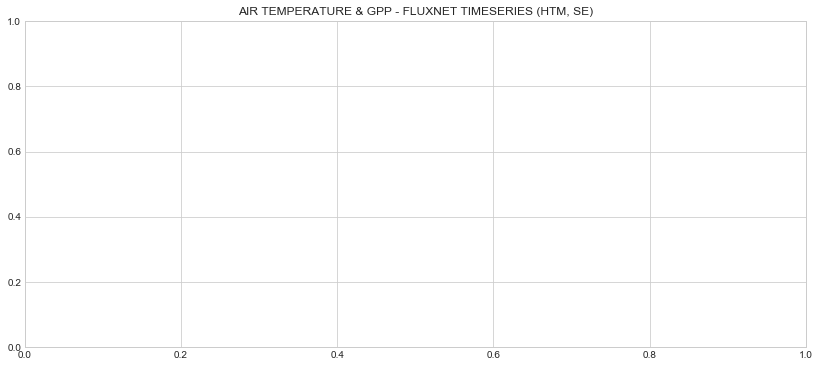

In [11]:
#Add grid:
plt.style.use('seaborn-whitegrid')

#Create a plot (i.e. "figure") object and set the size of your plot:
fig, ax = plt.subplots(figsize=(14, 6))

#Add plot title:
plt.title('AIR TEMPERATURE & GPP - FLUXNET TIMESERIES (HTM, SE)')

#Plot values for daily Air Temperature:
ax.plot(dd_df.TIMESTAMP, dd_df.TA_F,
         linestyle = '-.', linewidth = 0.6, color = 'darkorange',
         label = 'Air Temperature')

#Plot values for daytime GPP (daily values):
ax.plot(dd_df.TIMESTAMP, dd_df.GPP_DT_VUT_MEAN,
         linestyle = '-', linewidth = 1.7, color = '#6699CC',
         label = 'GPP')

#Add secondary y-axis:
secaxy = ax.secondary_yaxis('right')

#Add x-axis label:
plt.xlabel('Time')

#Add y-axis label:
plt.ylabel('Air Temperature (C \N{DEGREE SIGN})')

#Add secondary y-axis label:
secaxy.set_ylabel('GPP (gC / m2 / d)')

#Add legend:
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
    
#Show plot:
plt.show()



<br>
<br>
<div style="text-align: right"> 
    <a href="#intro">Back to top</a>
</div>
<br>
<br>

<a id="compare_var">

<br>

### <font color='#B22222'>Task 4</font> - Compare the same variable from 2 stations
Here you will create a matplotlib plot including values from the same variable from two different stations. Before you create the plot, you need to read the values from another station to a Pandas DataFrame (see task 1). Then you plot the values of the same variable for both stations.

Here's an example of the code:

```python

#Read data from Hyltemossa station:
htm_df = pd.read_csv("~/climbeco/data/fluxnet/obs_dd/FLX_SE-Htm_DD_2015_2018.csv",
                     header = 0,
                     sep = ",",
                     parse_dates = ["TIMESTAMP"])

#Read data from Lanna station:
lnn_df = pd.read_csv("~/climbeco/data/fluxnet/obs_dd/FLX_SE-Lnn_DD_2015_2018.csv",
                     header = 0,
                     sep = ",",
                     parse_dates = ["TIMESTAMP"])



#Add grid:
plt.style.use('seaborn-whitegrid')

#Create a plot (i.e. "figure") object and set the size of your plot:
fig = plt.figure(figsize=(16, 6))

#Add plot title:
plt.title('GPP - FLUXNET TIMESERIES (daily values)')

#Plot values for Hyltemossa:
plt.plot(htm_df.TIMESTAMP, htm_df.GPP_DT_VUT_MEAN,
         linestyle = '-.', linewidth = 0.5, color = 'green',
         label = 'Hyltemossa')

#Plot values for Lanna:
plt.plot(lnn_df.TIMESTAMP, lnn_df.GPP_DT_VUT_MEAN,
         linestyle = '-', linewidth = 1.7, color = 'darkgreen',
         label = 'Lanna')

#Add x-axis label:
plt.xlabel('Time')

#Add y-axis label:
plt.ylabel('GPP (gC / m2 / d)')

#Add legend:
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
#Show plot:
plt.show()

```

<br>

The code from the example above creates a plot of GPP daily values for the stations Hyltemossa and Lanna in Sweden. The output should look like this:

<img src='climbeco/images/mod1/plot2stations.png'>

<br>

Now, try to create plots for other stations. For instance, it might be interesting to compare variables from stations with the same vegetation type. It might also be worth to compare the same variable from stations that have different vegetation types.

Use the _inspect_fluxnet_files_ notebok to view a map of the stations. Hover over the markers to get a pop-up window with additional info about the corresponding station. Alternatively, click [here](/climbeco/ancillarydata/docs/climbeco_course_station_list.png) to view the station info table.

<br>
<br>

In [12]:
#Read data from Hyltemossa station:
htm_df = pd.read_csv("~/climbeco/data/fluxnet/obs_dd/FLX_SE-Htm_DD_2015_2018.csv",
                     header = 0,
                     sep = ",",
                     parse_dates = ["TIMESTAMP"])

#Read data from Lanna station:
lnn_df = pd.read_csv("~/climbeco/data/fluxnet/obs_dd/FLX_SE-Lnn_DD_2015_2018.csv",
                     header = 0,
                     sep = ",",
                     parse_dates = ["TIMESTAMP"])



#Add grid:
plt.style.use('seaborn-whitegrid')

#Create a plot (i.e. "figure") object and set the size of your plot:
fig = plt.figure(figsize=(16, 6))

#Add plot title:
plt.title('GPP - FLUXNET TIMESERIES (daily values)')

#Plot values for Hyltemossa:
plt.plot(htm_df.TIMESTAMP, htm_df.GPP_DT_VUT_MEAN,
         linestyle = '-.', linewidth = 0.5, color = 'green',
         label = 'Hyltemossa')

#Plot values for Lanna:
plt.plot(lnn_df.TIMESTAMP, lnn_df.GPP_DT_VUT_MEAN,
         linestyle = '-', linewidth = 1.7, color = 'darkgreen',
         label = 'Lanna')

#Add x-axis label:
plt.xlabel('Time')

#Add y-axis label:
plt.ylabel('GPP (gC / m2 / d)')

#Add legend:
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
    
#Show plot:
plt.show()



FileNotFoundError: [Errno 2] File C:\Users\Claudio/climbeco/data/fluxnet/obs_dd/FLX_SE-Htm_DD_2015_2018.csv does not exist: 'C:\\Users\\Claudio/climbeco/data/fluxnet/obs_dd/FLX_SE-Htm_DD_2015_2018.csv'

<br>
<br>
<div style="text-align: right"> 
    <a href="#intro">Back to top</a>
</div>
<br>
<br>

<a id="calc_stat">

<br>

### <font color='#B22222'>Task 5</font> - Calculate and plot statistics
Use the _drought 2018_ - notebook with ICOS data from Hyltemossa station to see how to filter a Pandas DataFrame by time and calculate statistics. Apply the same code to the FLUXNET-data to calculate statistics for variables and stations of your choice. You can plot the results using code from the previous tasks or by using the ["one-liner"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) command below:

```python
pandas_df_name.plot(type='line', 'colName_Xaxis', 'colName_Yaxis')```

<br>
<br>

<font color='darkred'>**Example 1 (barplot)**</font>
<br>
Here's an example of calculating the minimum air temperature per year for Hyltemossa station:

```python

#Read data from Hyltemossa station:
htm_df = pd.read_csv("~/climbeco/data/fluxnet/obs_dd/FLX_SE-Htm_DD_2015_2018.csv",
                     header = 0,
                     sep = ",",
                     parse_dates = ["TIMESTAMP"])

#Set the "TIMESTAMP" column as index:
htm_df_ind = htm_df.set_index('TIMESTAMP')

#Calculate minimum temperature for every year:
annual_mean_temp = htm_df_ind.TA_F.resample('Y').min().dropna()

#Create barplot:
annual_mean_temp.plot(kind='bar', figsize=(10,6))
```

<br>

The code above will generate the following output:
<br>
<img src="../ancillarydata/images/mod1/barplot.png" width=500>

<br>
<br>

<font color='darkred'>**Example 2 (line-plot)**</font>
<br>
Here's an example of calculating the mean GPP per month for Hyltemossa station:

```python

#Read data from Hyltemossa station:
htm_df = pd.read_csv("~/climbeco/data/fluxnet/obs_dd/FLX_SE-Htm_DD_2015_2018.csv",
                     header = 0,
                     sep = ",",
                     parse_dates = ["TIMESTAMP"])

#Set the "TIMESTAMP" column as index:
htm_df_ind = htm_df.set_index('TIMESTAMP')

#Calculate the mean GPP value for every month in the dataset:
annual_mean_temp = htm_df_ind.GPP_DT_VUT_MEAN.resample('M').mean().dropna()

#Create line-plot:
annual_mean_temp.plot(kind='line', figsize=(10,6))
```

<br>

The code above will generate the following output:
<br>
<img src="../ancillarydata/images/mod1/lineplot.png" width=500>


In [ ]:
#Read data from Hyltemossa station:
htm_df = pd.read_csv("~/climbeco/data/fluxnet/obs_dd/FLX_SE-Htm_DD_2015_2018.csv",
                     header = 0,
                     sep = ",",
                     parse_dates = ["TIMESTAMP"])

#Set the "TIMESTAMP" column as index:
htm_df_ind = htm_df.set_index('TIMESTAMP')

#Calculate minimum temperature for every year:
annual_mean_temp = htm_df_ind.TA_F.resample('Y').min().dropna()

#Create barplot:
annual_mean_temp.plot(kind='bar', figsize=(10,6))



In [ ]:
#Read data from Hyltemossa station:
htm_df = pd.read_csv("~/climbeco/data/fluxnet/obs_dd/FLX_SE-Htm_DD_2015_2018.csv",
                     header = 0,
                     sep = ",",
                     parse_dates = ["TIMESTAMP"])

#Set the "TIMESTAMP" column as index:
htm_df_ind = htm_df.set_index('TIMESTAMP')

#Calculate mean GPP for every month:
annual_mean_temp = htm_df_ind.GPP_DT_VUT_MEAN.resample('M').mean().dropna()

#Create line-plot:
annual_mean_temp.plot(kind='line', figsize=(10,6))

<br>
<br>
<div style="text-align: right"> 
    <a href="#intro">Back to top</a>
</div>
<br>
<br>

<br>
<br>
<br>
<br>
<img src="../ancillarydata/logos/climbeco_contributors_logo.png" width="1000" align="left"/>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>